In [1]:
import socket
socket.gethostname()


'kingspeak1'

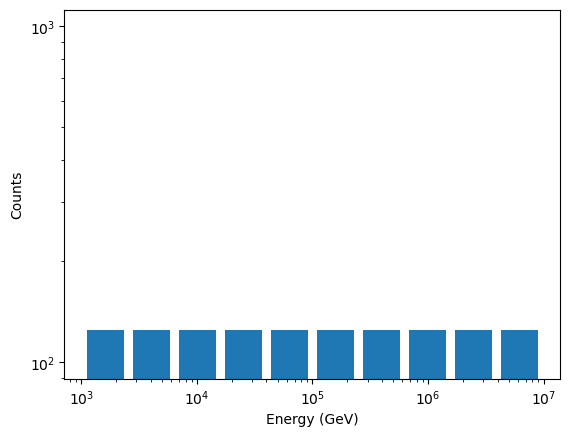

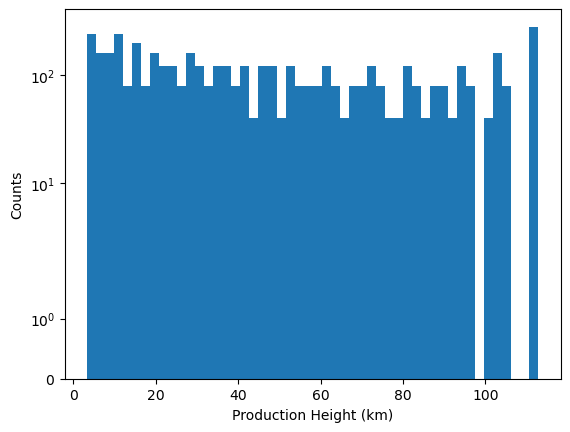

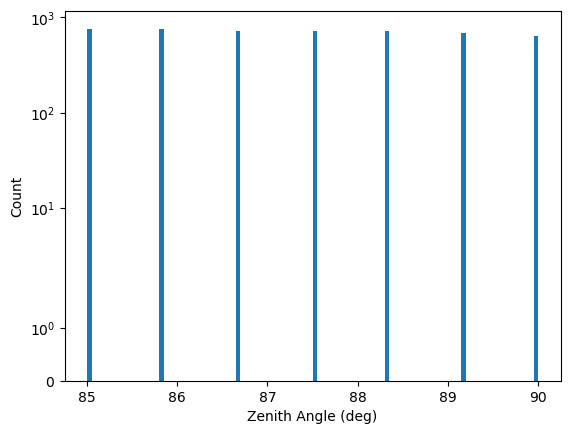

In [1]:
file ="/uufs/chpc.utah.edu/common/home/u1520754/corsika_inputs/sampled_data_1E3_1E7_5000events.txt"
import numpy as np
import matplotlib.pyplot as plt

# Read the data file
Energy, Pro_height, zenith, W = np.loadtxt(file, unpack=True)
energy_muonin = np.logspace(np.log10(min(Energy)), np.log10(max(Energy)), 50)
plt.hist(Energy, bins=energy_muonin, density=False, weights=None, log=True)
plt.xscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Counts')
plt.show()

plt.hist(Pro_height/1e5, bins=50, log=True, density=False, weights=None)
plt.yscale('symlog')
plt.xlabel('Production Height (km)')
plt.ylabel('Counts')
plt.show()

plt.hist(zenith, bins=100, log=True, density=False, weights=None)
plt.yscale('symlog')
plt.xlabel('Zenith Angle (deg)')
plt.ylabel('Count')
plt.show()


In [30]:
from matplotlib.colors import LogNorm
import gc
import sys
gc.collect() # Force garbage collection
import pickle
import numpy as np
import matplotlib.pyplot as plt
particle = 6
N=5001
name_tag = "1E3_1E7"  # Adjusted to match the script edits
with open(f'/uufs/chpc.utah.edu/common/home/u1520754/test_jupyter/outputs/Test_Events_Data_pid{particle}_N{N}_{name_tag}.pickle', 'rb') as f:    
    Events_Data2 = pickle.load(f)
x = list(Events_Data2) # Convert to list for easier manipulation
#Max_signal, E_i, h_i, weight_i, zenith_event_degree, azimuth_event_degree, Muon_locations, Muon_directions, Photon_locations, Photon_directions, Time_cam, Camera, Photon_camera
x = np.array(x, dtype=object)  # Convert to numpy array for easier manipulation
Max_Signal0 = np.zeros(len(x))
Energy0 = np.zeros(len(x))
Energy_muon0 = np.zeros(len(x))
Pro_height0 = np.zeros(len(x))
Pro_height_muon0 = np.zeros(len(x))
Weight0 = np.zeros(len(x))
zenith0 = np.zeros(len(x))
azimuth0 = np.zeros(len(x))
muon_position0 = np.zeros(len(x), dtype=object)
muon_direction0 = np.zeros(len(x), dtype=object)
Photon_locations0 = np.zeros(len(x), dtype=object)
Photon_directions0 = np.zeros(len(x), dtype=object)
Camera0 = np.zeros(len(x), dtype=object)
Photon_camera0 = np.zeros(len(x), dtype=object)
Charge0 = np.zeros(len(x))
for i in range(len(x)):
    Max_Signal0[i] = x[i][0]
    Energy0[i] = x[i][1][0]
    Pro_height0[i] = x[i][2][0]
    if len(x[i][1][1]) > 0:
        Energy_muon0[i] = x[i][1][1]
        Pro_height_muon0[i] = x[i][2][1]
    else:
        Energy_muon0[i] = np.nan
        Pro_height_muon0[i] = np.nan
    Weight0[i] = x[i][3]
    zenith0[i] = x[i][4]
    azimuth0[i] = x[i][5]+360
    muon_position0[i] = x[i][6]
    muon_direction0[i] = x[i][7]
    Photon_locations0[i] = x[i][8]
    Photon_directions0[i] = x[i][9]
    Camera0[i] = x[i][11]
    Photon_camera0[i] = x[i][12]
    Charge0[i] = np.sum(np.array(x[i][11]))


/tmp/ipykernel_1037531/2067022553.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Energy_muon0[i] = x[i][1][1]
/tmp/ipykernel_1037531/2067022553.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pro_height_muon0[i] = x[i][2][1]


In [31]:
valid_indices = (~np.isnan(Max_Signal0))&(Max_Signal0 >=0)
Max_Signal = Max_Signal0[valid_indices]
print(f"Number of valid Max_Signal entries: {len(Max_Signal)}")
Energy = Energy0[valid_indices]
Energy_muon = Energy_muon0[valid_indices]
Pro_height_muon = Pro_height_muon0[valid_indices]
Pro_height = Pro_height0[valid_indices]
Weight = np.array(Weight0)[valid_indices]
zenith = zenith0[valid_indices]
azimuth = azimuth0[valid_indices]
Charge = Charge0[valid_indices]
Photon_locations = np.array([(Photon_locations0[i]) for i in range(len(Photon_locations0)) if valid_indices[i]], dtype=object)
Photon_directions = np.array([(Photon_directions0[i]) for i in range(len(Photon_directions0)) if valid_indices[i]], dtype=object)
Photon_camera = ([(Photon_camera0[i]) for i in range(len(Photon_camera0)) if valid_indices[i]])

Muon_positions = np.array([(muon_position0[i]) for i in range(len(muon_position0)) if valid_indices[i]])
x_muon = Muon_positions[:,0].flatten()
y_muon = Muon_positions[:,1].flatten()
R_muon = np.sqrt(x_muon**2 + y_muon**2)

Muon_directions = np.array([(muon_direction0[i]) for i in range(len(muon_direction0)) if valid_indices[i]])
cos_z_muon_all = np.array((np.sqrt(1 - Muon_directions[:,0]**2 - Muon_directions[:,1]**2)))
phi_muon_all = np.array(np.degrees(np.arctan2(Muon_directions[:,1], Muon_directions[:,0]))).flatten()

incident_angle_muon_all = np.array(np.degrees(np.arccos(cos_z_muon_all))).flatten()
cos_z_photon_all = np.array([np.sqrt(1 - np.nanmean(i[0])**2 - np.nanmean(i[1])**2) for i in Photon_directions])
incident_angle_photon_all = np.array(np.degrees(np.arccos(cos_z_photon_all))).flatten()

def phi2azimuth(phi):
    azimuth = phi #+ (360-telescope_azimuth)
    azimuth[azimuth < 0] += 360
    azimuth[azimuth >= 360] -= 360
    return azimuth

def convert_coordinates_to_shower(cos_x, cos_y, azimuth_rad=np.radians(-280), zenith_deg=91):
    #Rotation around z axis such that the telescope is pointing at 280 azimuth
    x_i = (cos_x*np.cos(azimuth_rad) - cos_y*np.sin(azimuth_rad))  # normalized x direction
    y_i = (cos_x*np.sin(azimuth_rad) + cos_y*np.cos(azimuth_rad))  # normalized y direction
    z_i = np.sqrt(1 - x_i**2 - y_i**2)  # normalized z direction
    #Rotation around y axis:
    cos_x = (x_i*np.cos(np.radians(zenith_deg)) - z_i*np.sin(np.radians(zenith_deg)))
    #cos_z = (x_i*np.sin(np.radians(zenith_deg)) + z_i*np.cos(np.radians(zenith_deg)))
    cos_y = y_i  # normalized y direction
    return cos_x, cos_y
cos_z_original = np.cos(zenith*np.pi/180)
cos_y_original = np.sin(zenith*np.pi/180)*np.sin(np.radians(azimuth))
cos_x_original = np.sin(zenith*np.pi/180)*np.cos(np.radians(azimuth))
cos_x_original, cos_y_original = convert_coordinates_to_shower(cos_x_original, cos_y_original)
cos_z_original = np.sqrt(1 - cos_x_original**2 - cos_y_original**2)
muon_original_zenith = np.degrees(np.arccos(cos_z_original))
muon_original_azimuth = np.degrees(np.arctan2(cos_y_original, cos_x_original))
muon_original_azimuth = phi2azimuth(muon_original_azimuth)
muon_arrival_zenith = incident_angle_muon_all
muon_arrival_azimuth = phi2azimuth(phi_muon_all)

Number of valid Max_Signal entries: 4995


/tmp/ipykernel_1037531/1033944477.py:26: RuntimeWarning: Mean of empty slice
  cos_z_photon_all = np.array([np.sqrt(1 - np.nanmean(i[0])**2 - np.nanmean(i[1])**2) for i in Photon_directions])


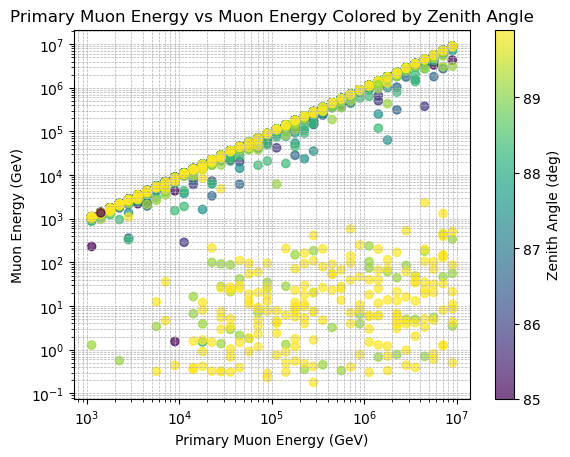

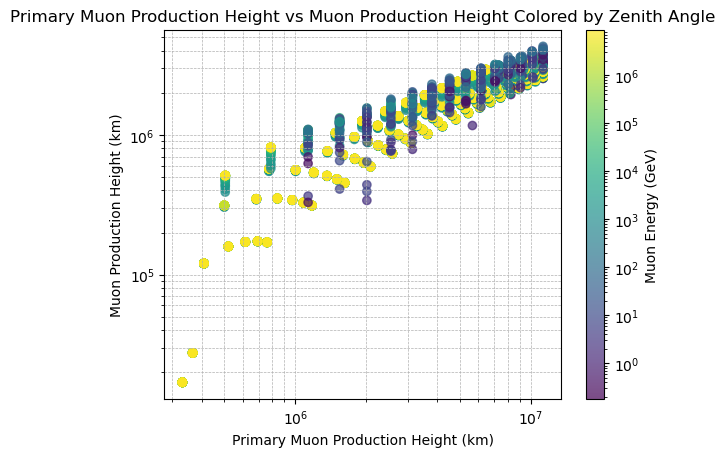

In [3]:
plt.scatter(Energy, Energy_muon, c=zenith, cmap='viridis', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Zenith Angle (deg)')
plt.xlabel('Primary Muon Energy (GeV)')
plt.ylabel('Muon Energy (GeV)')
plt.title('Primary Muon Energy vs Muon Energy Colored by Zenith Angle')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()
plt.scatter(Pro_height, Pro_height_muon, c=Energy_muon, cmap='viridis', alpha=0.7, norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Muon Energy (GeV)')
plt.xlabel('Primary Muon Production Height (km)')
plt.ylabel('Muon Production Height (km)')
plt.title('Primary Muon Production Height vs Muon Production Height Colored by Zenith Angle')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()

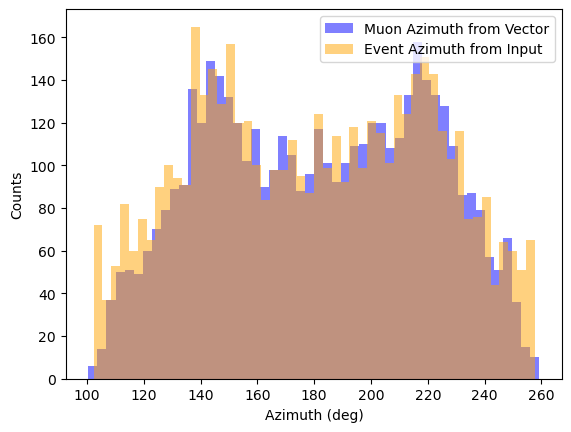

In [4]:
plt.hist(muon_arrival_azimuth, color='blue', alpha=0.5, bins=50, label='Muon Azimuth from Vector')
plt.hist(muon_original_azimuth, bins=50, color='orange', alpha=0.5, label='Event Azimuth from Input')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Counts')
plt.legend()
plt.show()

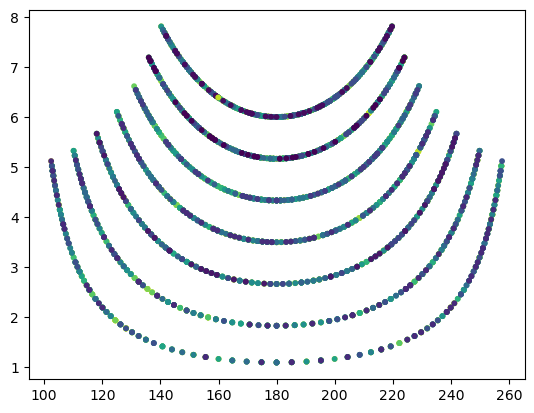

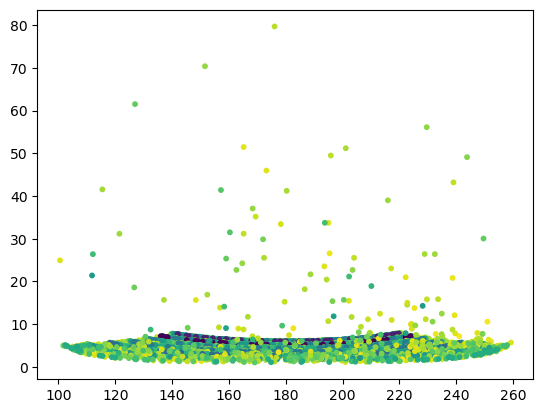

In [5]:
plt.scatter(muon_original_azimuth, muon_original_zenith,  s=10, c=Pro_height/1e5, alpha=1, norm=LogNorm())
plt.show()
plt.scatter(muon_arrival_azimuth, muon_arrival_zenith,  s=10, c=Pro_height_muon/1e5, alpha=1, norm=LogNorm())
plt.show()

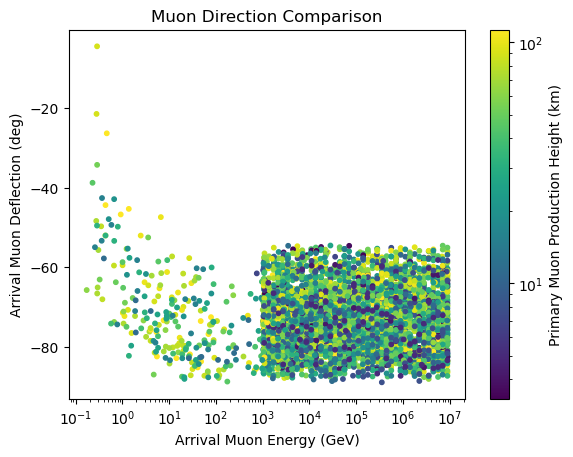

In [ ]:
plt.scatter(Energy_muon, muon_original_zenith- muon_arrival_zenith,  s=10, c=Pro_height/1e5, alpha=1, norm=LogNorm())
plt.ylabel('Arrival Muon Deflection (deg)')
plt.xlabel('Arrival Muon Energy (GeV)')
plt.xscale('log')
plt.title('Muon Direction Comparison')
plt.colorbar(label='Primary Muon Production Height (km)')
plt.show()

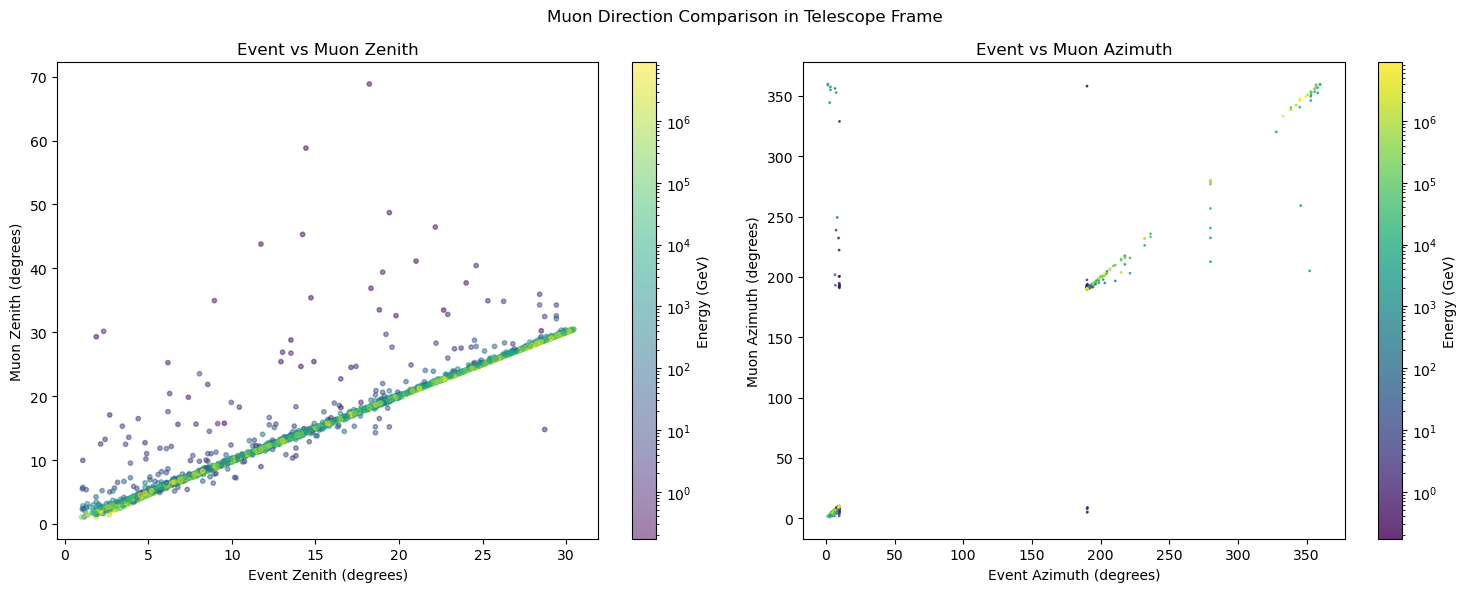

In [183]:
import matplotlib.pyplot as plt

# Create figure with subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Zenith comparison
mask = Energy > 0
scatter1 = ax1.scatter(muon_original_zenith[mask], muon_arrival_zenith[mask], 
                      c=Energy_muon[mask], s=10, alpha=0.5, 
                      cmap='viridis', norm=LogNorm())
ax1.set_xlabel('Event Zenith (degrees)')
ax1.set_ylabel('Muon Zenith (degrees)')
ax1.set_title('Event vs Muon Zenith')
cbar1 = plt.colorbar(scatter1, ax=ax1, label='Energy (GeV)')

# Right plot: Azimuth comparison
scatter2 = ax2.scatter(muon_original_azimuth, muon_arrival_azimuth, 
                      c=Energy_muon, s=1, alpha=0.8, 
                      cmap='viridis', norm=LogNorm())
ax2.set_xlabel('Event Azimuth (degrees)')
ax2.set_ylabel('Muon Azimuth (degrees)')
ax2.set_title('Event vs Muon Azimuth')
cbar2 = plt.colorbar(scatter2, ax=ax2, label='Energy (GeV)')
plt.suptitle('Muon Direction Comparison in Telescope Frame')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


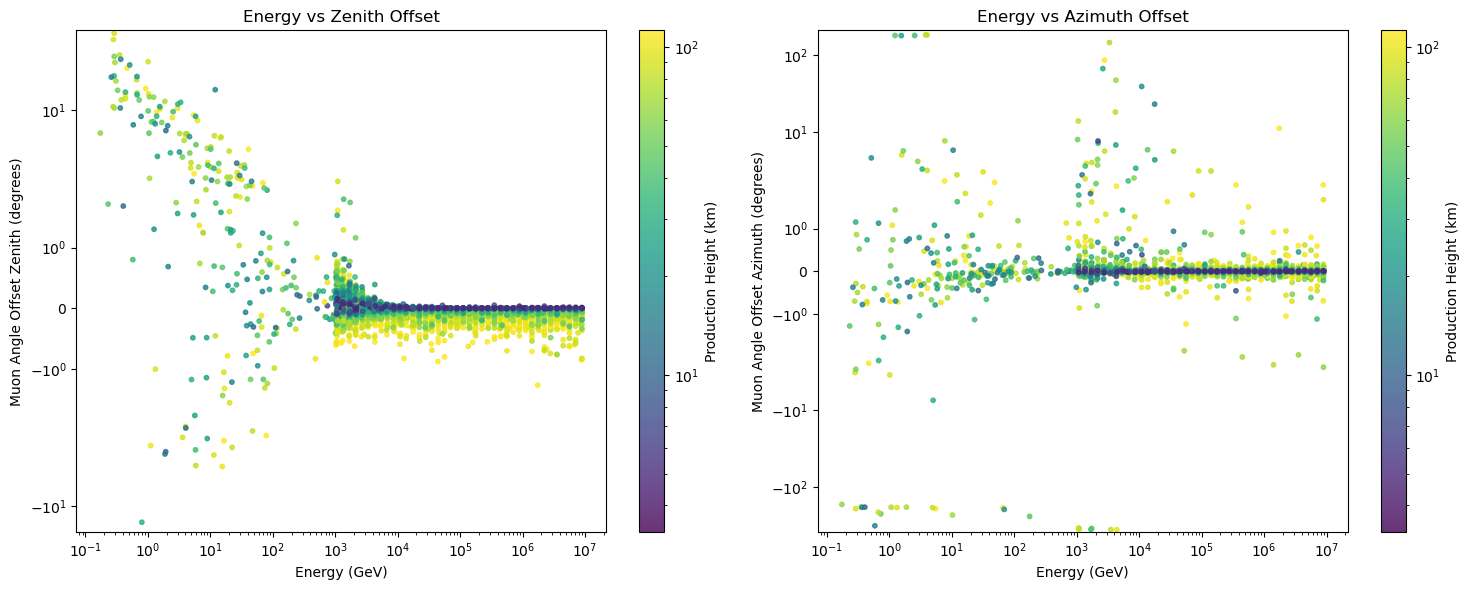

In [184]:
# Create figure with subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Energy vs Zenith Offset
scatter1 = ax1.scatter(Energy_muon, muon_arrival_zenith-muon_original_zenith, 
                      c=Pro_height/1e5, s=10, alpha=0.8, 
                      cmap='viridis', norm=LogNorm())
ax1.set_xscale('log')
ax1.set_yscale('symlog')
ax1.set_xlabel('Energy (GeV)')
ax1.set_ylabel('Muon Angle Offset Zenith (degrees)')
ax1.set_title('Energy vs Zenith Offset')
cbar1 = plt.colorbar(scatter1, ax=ax1, label='Production Height (km)')

# Right plot: Energy vs Azimuth Offset
scatter2 = ax2.scatter(Energy_muon, muon_original_azimuth - muon_arrival_azimuth, 
                      c=Pro_height/1e5, s=10, alpha=0.8, 
                      cmap='viridis', norm=LogNorm())
ax2.set_xscale('log')
ax2.set_yscale('symlog')
ax2.set_xlabel('Energy (GeV)')
ax2.set_ylabel('Muon Angle Offset Azimuth (degrees)')
ax2.set_title('Energy vs Azimuth Offset')
cbar2 = plt.colorbar(scatter2, ax=ax2, label='Production Height (km)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Number of valid Max_Signal entries: 101


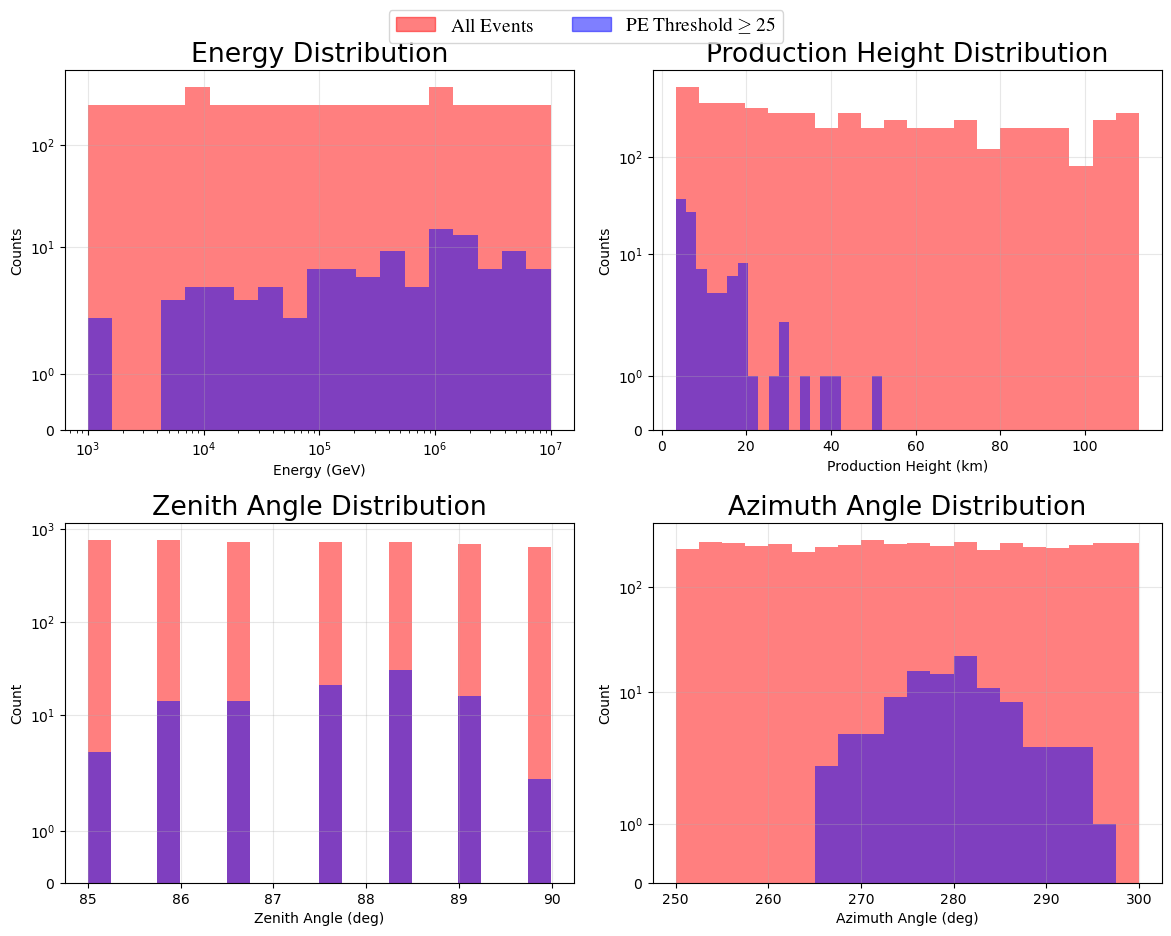

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2x2 subplot figure
# Exclude nan values in Max_Signal


print(f"Number of valid Max_Signal entries: {len(Max_Signal)}")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.rcParams.update({
    'text.usetex': True,           # Enable LaTeX rendering
    'font.family': 'times',        # Use times font
    'font.size': 16,               # Set font size
    'font.weight': 'bold',         # Set font weight
})

# Plot 1: Energy histogram (top-left)
energy_muonin = np.logspace(3, 7, 20)
axes[0, 0].hist(Energy0, bins=energy_muonin, range=(3, 7), density=False, log=True, alpha=0.5, color='red')
axes[0, 0].hist(Energy, bins=energy_muonin, range=(3, 7), density=False, log=True, alpha=0.5, color='blue')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('symlog')
axes[0, 0].set_xlabel('Energy (GeV)')
axes[0, 0].set_ylabel('Counts')
axes[0, 0].set_title('Energy Distribution')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Production Height histogram (top-right)
axes[0, 1].hist([h/1e5 for h in Pro_height0], bins=20, range=(min(Pro_height0)/1e5, max(Pro_height0)/1e5), log=True, density=False, alpha=0.5, color='red')
axes[0, 1].hist([h/1e5 for h in Pro_height], bins=20, range=(min(Pro_height)/1e5, max(Pro_height)/1e5), log=True, density=False, alpha=0.5, color='blue')
axes[0, 1].set_yscale('symlog')
axes[0, 1].set_xlabel('Production Height (km)')
axes[0, 1].set_ylabel('Counts')
axes[0, 1].set_title('Production Height Distribution')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Zenith Angle histogram (bottom-left)
axes[1, 0].hist(zenith0, bins=20, log=True, density=False, alpha=0.5, color='red')
axes[1, 0].hist(zenith, bins=20, log=True, density=False, alpha=0.5, color='blue')
axes[1, 0].set_yscale('symlog')
axes[1, 0].set_xlabel('Zenith Angle (deg)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Zenith Angle Distribution')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Azimuth Angle histogram (bottom-right)
axes[1, 1].hist(azimuth0, bins=20, range=(250, 300), log=True, density=False, alpha=0.5, color='red')
axes[1, 1].hist(azimuth, bins=20, range=(250, 300), log=True, density=False, alpha=0.5, color='blue')
axes[1, 1].set_yscale('symlog')
axes[1, 1].set_xlabel('Azimuth Angle (deg)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Azimuth Angle Distribution')
axes[1, 1].grid(True, alpha=0.3)

# Create custom legend handles
from matplotlib.patches import Patch
legend_handles = [
    Patch(color='red', alpha=0.5, label=r'All Events'),
    Patch(color='blue', alpha=0.5, label=r'PE Threshold $\geq 25$')
]

# Add single legend outside the plots
fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=14)

# Adjust layout to make room for legend
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Make room for legend at top
plt.show()
plt.close("all")


/tmp/ipykernel_1037531/4187679483.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[0].scatter(x_muon, y_muon, c='white', alpha=1, s=500, marker='x',


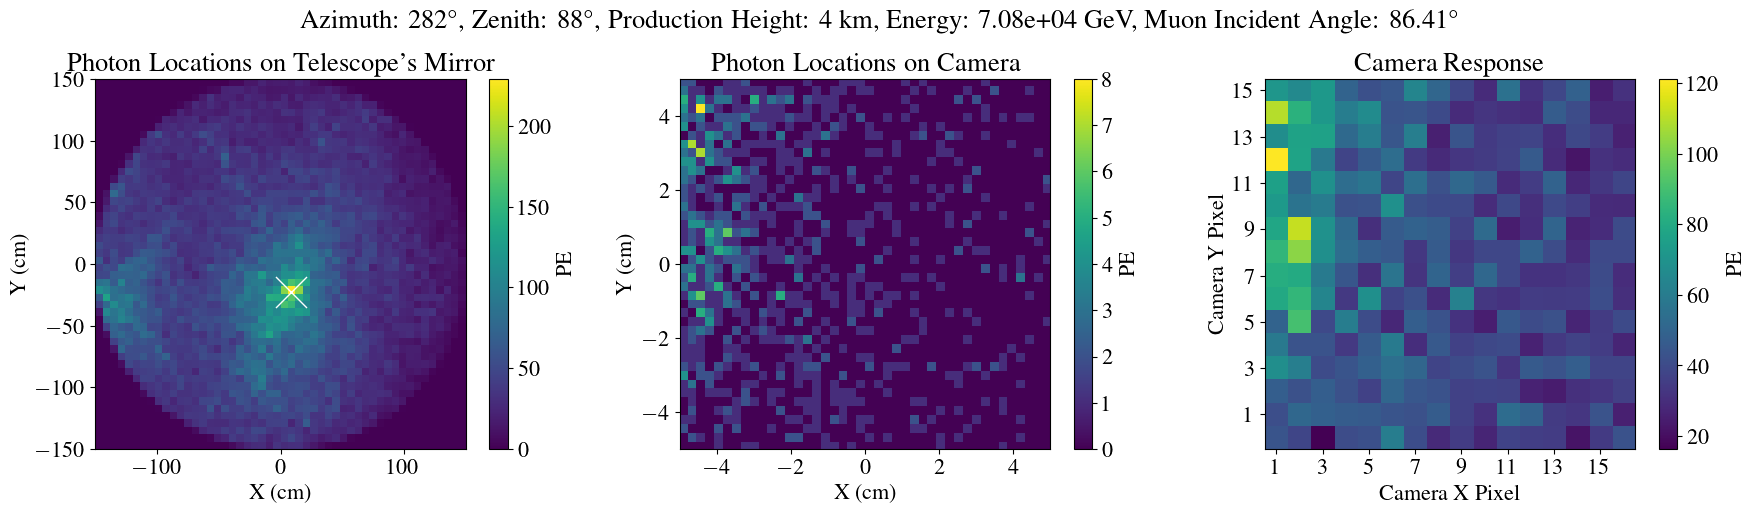

In [26]:
Camera = np.array([np.sum(Camera0[i], axis=0) for i in range(len(Camera0)) if valid_indices[i]])
i = 4 #2 at Max_Signal >= 35
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.rcParams.update({
    'text.usetex': True,           # Enable LaTeX rendering
    'font.family': 'times',        # Use times font
    'font.size': 16,                # Set font size
    'font.weight': 'bold',        # Set font weight
})

# First subplot - bins from -150 to 150
x, y = Photon_locations[i]
x_muon, y_muon = Muon_positions[i]
cos_z_muon = np.sqrt(Muon_directions[i][0]**2 + Muon_directions[i][1]**2)
incident_angle_muon = np.degrees(np.arccos(cos_z_muon))
im1 = axes[0].hist2d(x, y, bins=50, range=[[-150, 150], [-150, 150]])#, norm=LogNorm())
plt.colorbar(im1[3], ax=axes[0], label='PE')
axes[0].scatter(x_muon, y_muon, c='white', alpha=1, s=500, marker='x', 
                edgecolors='black', linewidths=1, label=r'Muon Impact Point')
axes[0].set_xlabel(r'X (cm)')
axes[0].set_ylabel(r'Y (cm)')
axes[0].set_title(r"Photon Locations on Telescope's Mirror")
axes[0].set_aspect('equal')  # Equal aspect ratio

# Second subplot - bins from -6 to 6
x_cam, y_cam = Photon_camera[i]
im2 = axes[1].hist2d(x_cam, y_cam, bins=50, range=[[-6, 6], [-6, 6]]) #, norm=LogNorm())
plt.colorbar(im2[3], ax=axes[1], label='PE')
axes[1].set_xlabel(r'X (cm)')
axes[1].set_ylabel(r'Y (cm)')
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-5, 5)
axes[1].set_title(r'Photon Locations on Camera')
axes[1].set_aspect('equal')  # Equal aspect ratio

# Third subplot
Cam = np.flip(Camera[i], axis=0) # Flip the camera image vertically for correct orientation
im3 = axes[2].imshow(Cam, cmap='viridis')#, norm=LogNorm())
plt.colorbar(im3, ax=axes[2], label='PE')

# Set axis ticks to go from 1 to 16
axes[2].set_xticks(range(0,16,2))
axes[2].set_xticklabels(np.arange(1, 17, 2))
axes[2].set_yticks(range(0,16,2))
axes[2].set_yticklabels(np.flip(np.arange(1, 17, 2)))

axes[2].set_xlabel(r'Camera X Pixel')
axes[2].set_ylabel(r'Camera Y Pixel')
axes[2].set_title(r'Camera Response')
axes[2].set_aspect('equal')  # Equal aspect ratio

# Global title
fig.suptitle(rf'Azimuth: {azimuth[i]:.0f}°, Zenith: {zenith[i]:.0f}°, Production Height: {Pro_height[i]/1e5:.0f} km, Energy: {Energy[i]:.2e} GeV, Muon Incident Angle: {incident_angle_muon[0]:.2f}°')

plt.tight_layout()
plt.show()
plt.close("all")

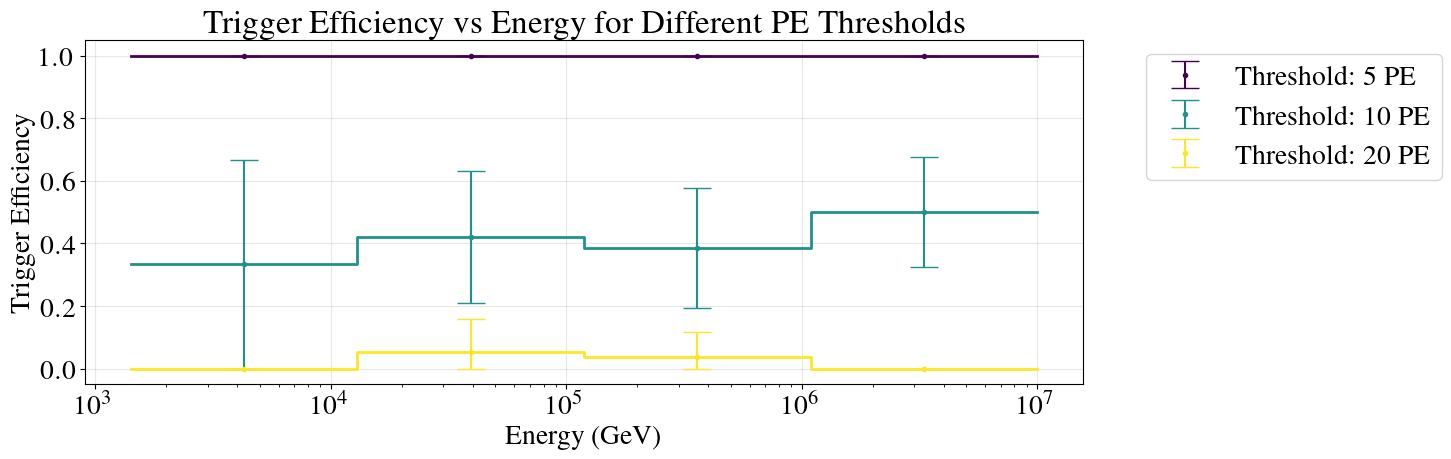

In [4]:
# Define energy ranges (logarithmic bins)
def detect_prob(pe_counts, Energy, E_min, E_max, threshold):
    # Poisson-based detection probability
    pe_counts = pe_counts[(Energy >= E_min)&(Energy <= E_max)]
    #Randomly select 1000 sample from pe_counts
    if len(pe_counts) == 0:
        a = 1
    else:
        a = 0
    p_det = len(pe_counts[np.where(pe_counts >= threshold)])/(len(pe_counts)+a)
    # Bootstrap CI
    rng = np.random.default_rng()
    p_boot = []
    n_bootstrap = 10000
    N = len(pe_counts)
    alpha = 0.05
    for _ in range(n_bootstrap):
        sample = rng.choice(pe_counts, size=N, replace=True)
        p_b = len(sample[np.where(sample >= threshold)])/(len(sample)+a)
        p_boot.append(p_b)
    lower = p_det - np.percentile(p_boot, 100 * alpha/2)
    upper = np.percentile(p_boot, 100 * (1 - alpha/2)) - p_det
    ci_bootstrap = (lower, upper)
    return p_det, ci_bootstrap

# Generate sample data for demonstration


energy_muonins = np.logspace(np.log10(min(Energy)), np.log10(1e7), 5)
energy_centers = np.sqrt(energy_muonins[:-1] * energy_muonins[1:])  # Geometric mean for log scale
thresholds = [5, 10,20]  # Different PE thresholds

# Create the plot
plt.figure(figsize=(15, 5))
#plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    'text.usetex': True,           # Enable LaTeX rendering
    'font.family': 'times',        # Use times font
    'font.size': 20,                # Set font size
    'font.weight': 'bold',        # Set font weight
})
colors = plt.cm.viridis(np.linspace(0, 1, len(thresholds)))
for i, threshold in enumerate(thresholds):
    detection_probs = []
    error_lower = []
    error_upper = []
    
    for j in range(len(energy_muonins)-1):
        E_min = energy_muonins[j]
        E_max = energy_muonins[j+1]
        
        p_det, ci = detect_prob(Max_Signal, Energy, E_min, E_max, threshold)
        detection_probs.append(p_det)
        error_lower.append(ci[0])
        error_upper.append(ci[1])
    
    # Plot with error bars
    plt.errorbar(energy_centers, detection_probs, 
                yerr=[error_lower, error_upper],
                fmt='.',
                color=colors[i], label=f'Threshold: {threshold} PE',
                capsize=10, capthick=1)

    # Create extended points for centered histogram style
    extended_x = []
    extended_y = []
    for j in range(len(energy_centers)):
        if j == 0:
            extended_x.append(energy_muonins[j])
            extended_y.append(detection_probs[j])
        extended_x.append(energy_centers[j])
        extended_x.append(energy_muonins[j+1])
        extended_y.append(detection_probs[j])
        extended_y.append(detection_probs[j])

    plt.plot(extended_x, extended_y, drawstyle='steps-pre', linewidth=2, color=colors[i])

plt.xscale('log')
plt.yscale('linear')
plt.xlabel(r'Energy (GeV)')
plt.ylabel(r'Trigger Efficiency')
plt.title(r'Trigger Efficiency vs Energy for Different PE Thresholds')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close("all")

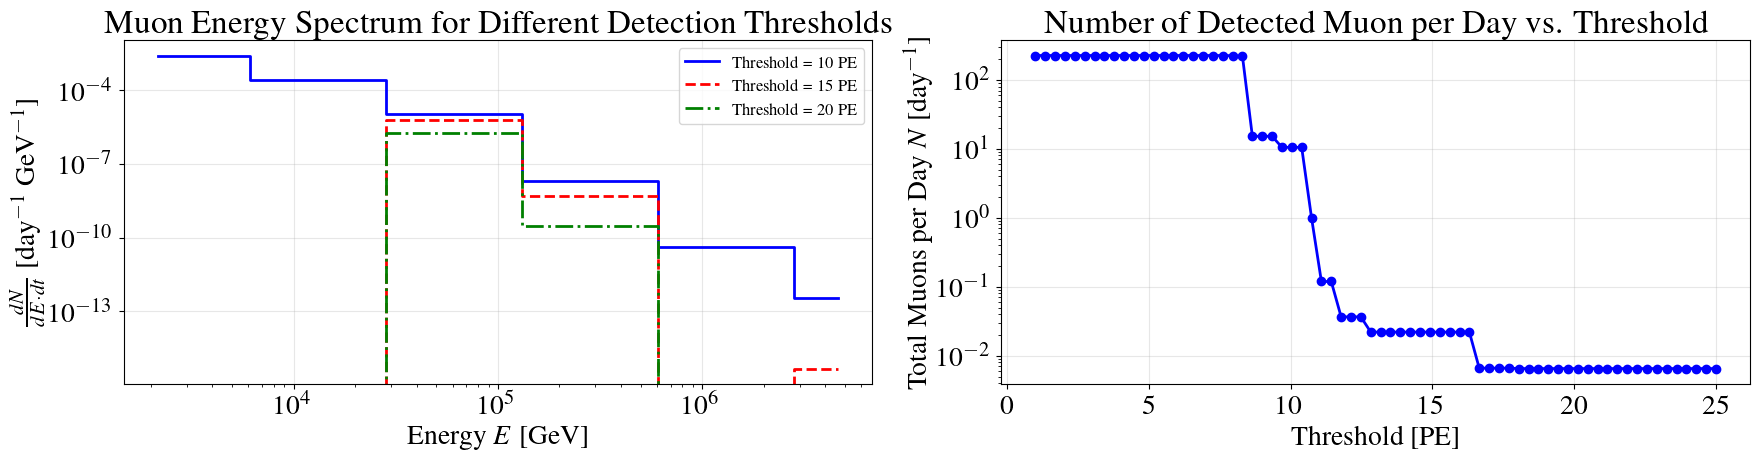

In [5]:
def get_number_of_muon(weights, R=150, azimuth_min=250, azimuth_max=300, zenith_min=80, zenith_max=90):
    phi_min = np.radians(azimuth_min)
    phi_max = np.radians(azimuth_max)
    theta_min = np.radians(zenith_min)
    theta_max = np.radians(zenith_max)
    Area = np.pi * R**2  # cm^2
    Solid_angle = (phi_max - phi_min) * (np.cos(theta_min) - np.cos(theta_max))
    N_mu_per_s = weights * Area * Solid_angle
    N_per_day = N_mu_per_s * 3600 * 24
    return np.array(N_per_day)

# Set up plotting parameters
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    'text.usetex': True,           # Enable LaTeX rendering
    'font.family': 'times',        # Use serif font
    'font.size': 20                # Set font size
})

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Energy Spectrum for Different Thresholds
thresholds = [10,15,20]
colors = ['blue', 'red', 'green']
linestyles = ['-', '--', '-.']

# Create energy bins
Energy_bins = np.logspace(3, 7, 7)
E_bins = np.sqrt(Energy_bins[:-1] * Energy_bins[1:]) 

# Plot for each threshold
for threshold, color, linestyle in zip(thresholds, colors, linestyles):
    # Apply mask for current threshold
    mask = Max_Signal >= threshold
    N_per_day = get_number_of_muon(Weight[mask])
    E = np.array(Energy)[mask]

    N_mu_E = []

    # Fixed binning logic
    for i in range(len(Energy_bins)-1):
        e_region = (E >= Energy_bins[i]) & (E < Energy_bins[i+1])
        N_mu_E.append(np.sum(N_per_day[e_region]))

    # Plot the current threshold
    ax1.plot(E_bins, N_mu_E, drawstyle='steps-mid', linewidth=2, 
             color=color, linestyle=linestyle, 
             label=f'Threshold = {threshold} PE')

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel(r"Energy $E$ [GeV]")
ax1.set_ylabel(r"$\frac{dN}{dE \cdot dt}$ [day$^{-1}$ GeV$^{-1}$]")
ax1.set_title(r"Muon Energy Spectrum for Different Detection Thresholds")
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot 2: Total Muons vs Threshold
thresholds_range = np.linspace(1, 25, 70)
total_muons = []

# Calculate total number of muons for each threshold
for threshold in thresholds_range:
    # Apply mask for current threshold
    mask = Max_Signal >= threshold
    N_per_day = get_number_of_muon(Weight[mask])
    E = np.array(Energy)[mask]

    # Calculate N_mu_E for this threshold
    N_mu_E = []
    for i in range(len(Energy_bins)-1):
        e_region = (E >= Energy_bins[i]) & (E < Energy_bins[i+1])
        N_mu_E.append(np.sum(N_per_day[e_region]))

    # Calculate total number of muons per day
    N = sum(np.array(N_mu_E) * (Energy_bins[1] - Energy_bins[0]))
    total_muons.append(N)

# Create the plot
ax2.plot(thresholds_range, total_muons, 'o-', linewidth=2, markersize=6, color='blue')
ax2.set_yscale("log")
ax2.set_xlabel(r"Threshold [PE]")
ax2.set_ylabel(r"Total Muons per Day $N$ [day$^{-1}$]")
ax2.set_title(r"Number of Detected Muon per Day vs. Threshold")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close("all")


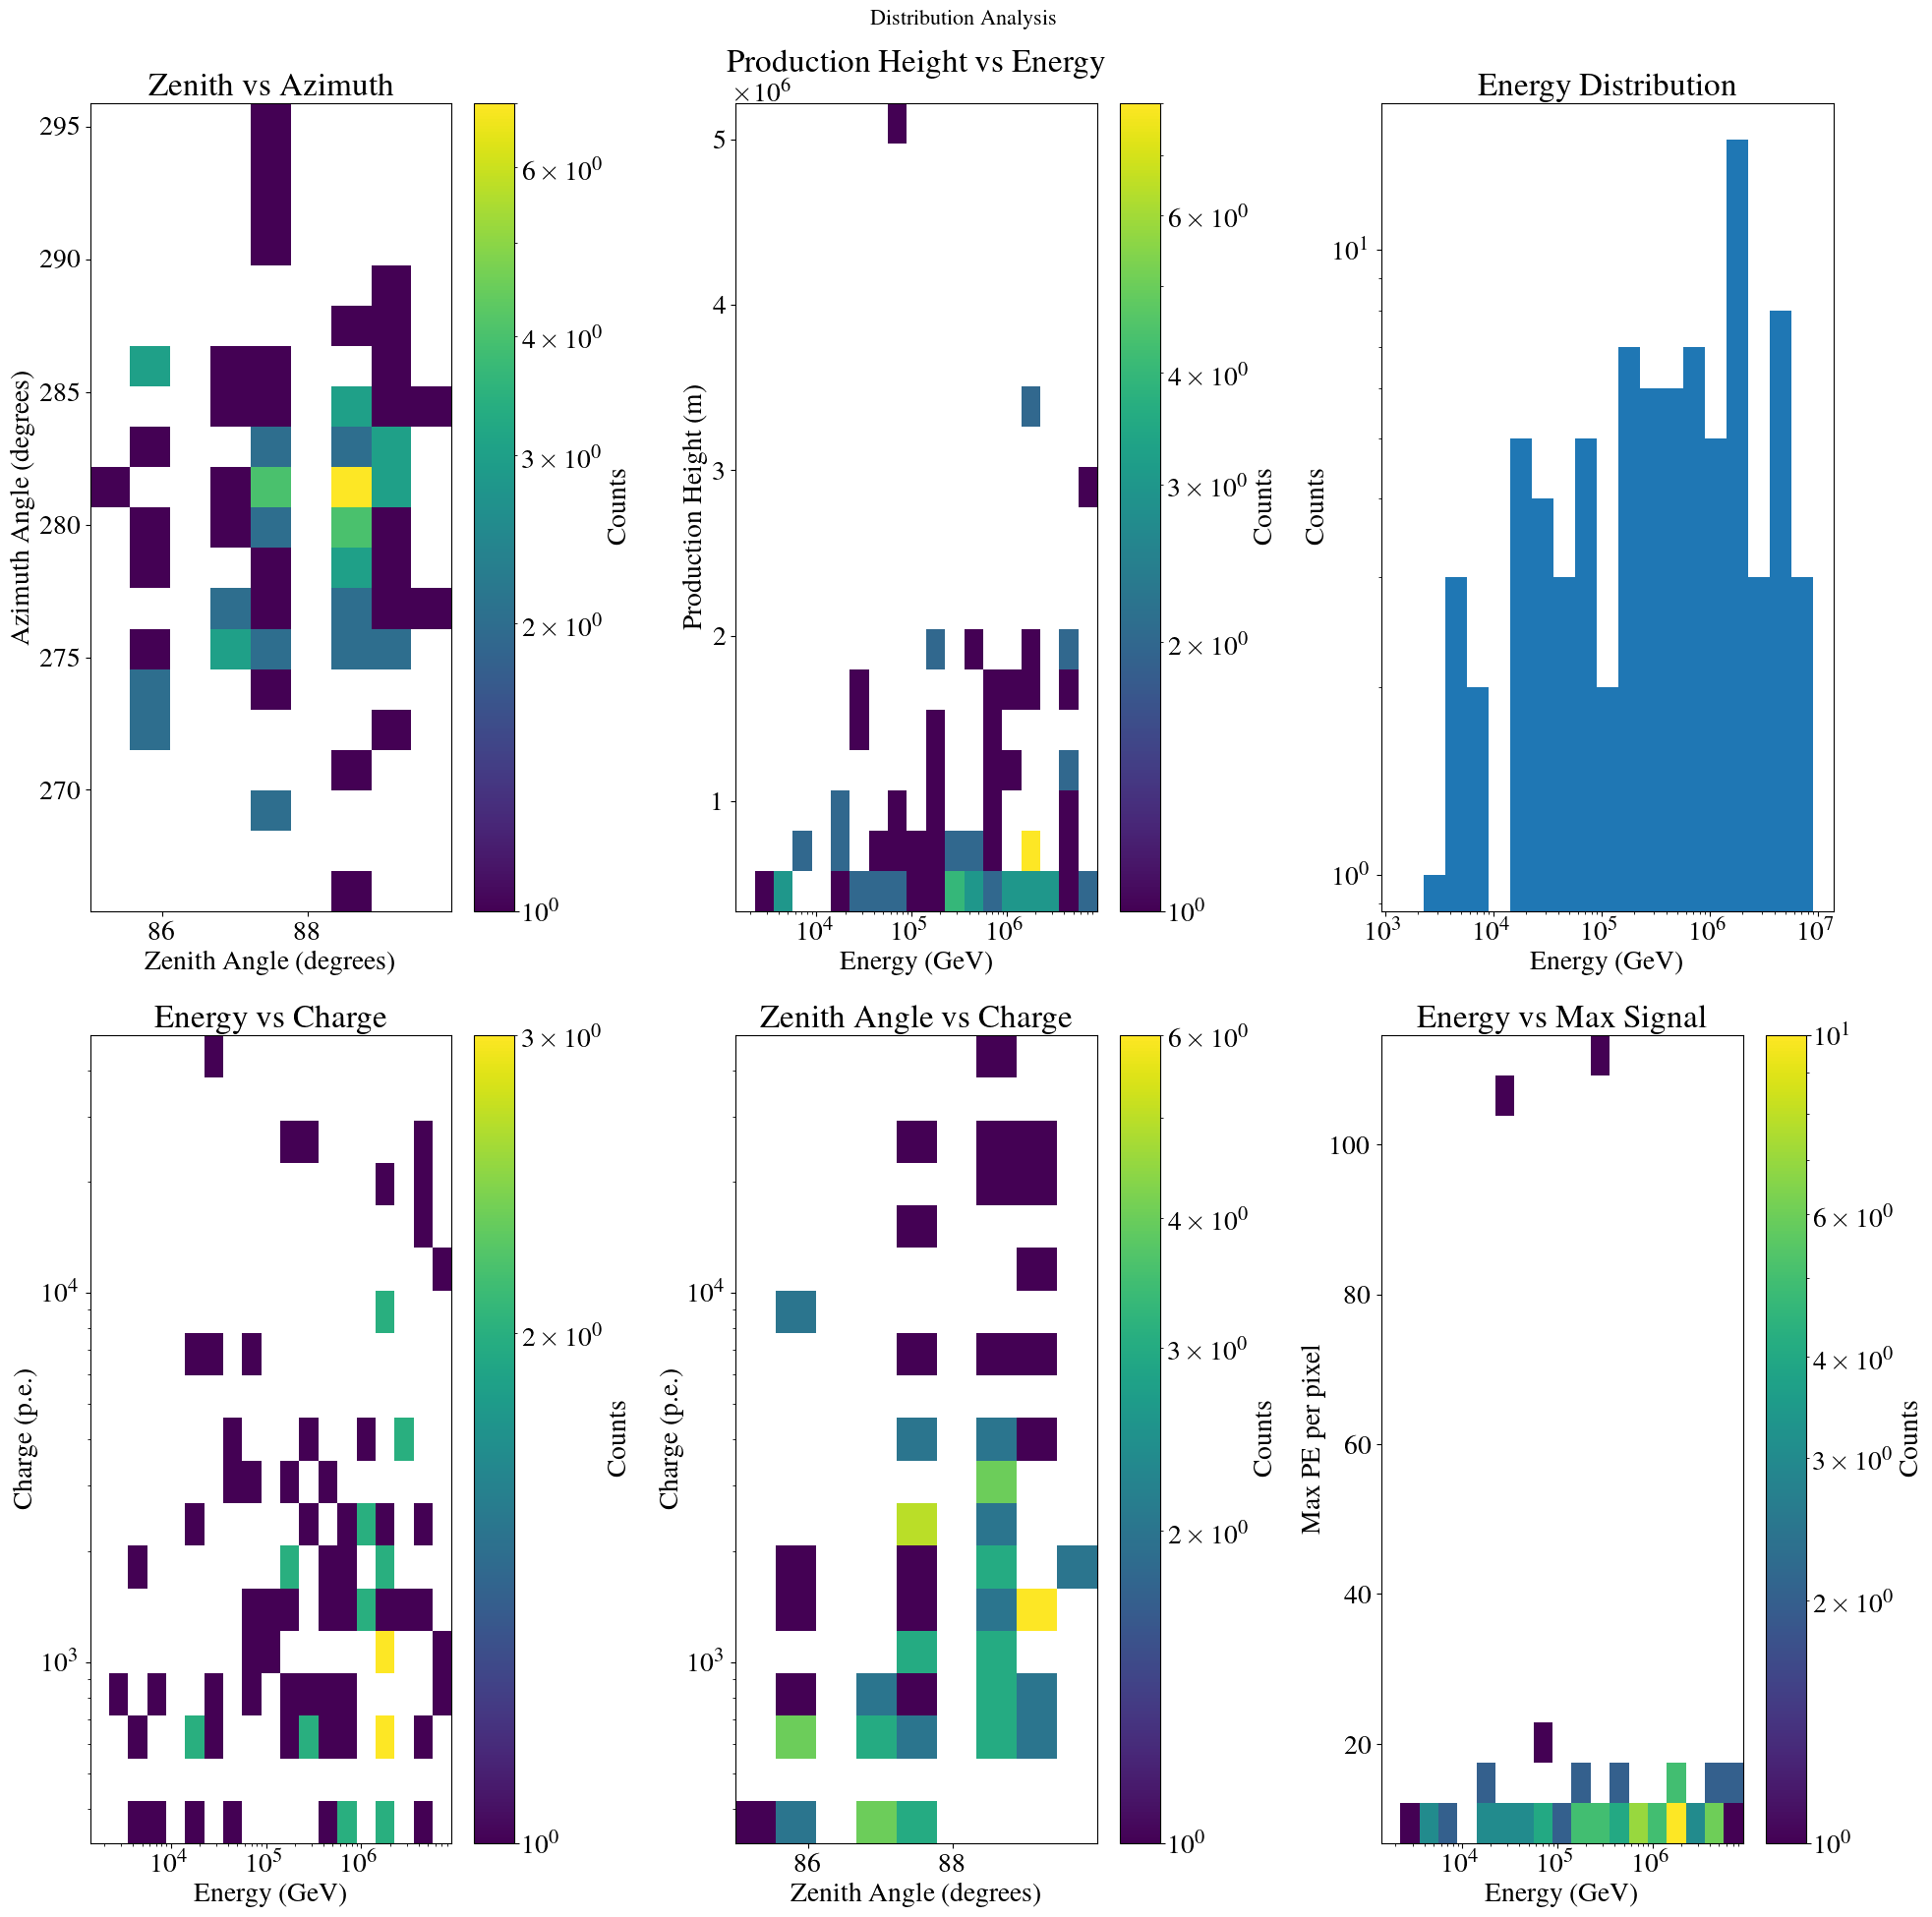

In [7]:
mask = (Max_Signal > 0) 
# Create 2x3 subplot grid
#plt.style.use('dark_background')
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
fig.suptitle('Distribution Analysis', fontsize=16)
# Create log-scale energy bins for all energy-related plots
energy_bin = np.logspace(np.log10(min(Energy[mask])), np.log10(max(Energy[mask])), 20)
charge_bin = np.logspace(np.log10(min(Charge[mask])), np.log10(max(Charge[mask])), 20)
# Plot 1: Zenith vs Azimuth 2D histogram
im1 = axes[0, 0].hist2d(zenith[mask], azimuth[mask], bins=[9,20], cmap='viridis', norm=LogNorm())
axes[0, 0].set_xlabel('Zenith Angle (degrees)')
axes[0, 0].set_ylabel('Azimuth Angle (degrees)')
axes[0, 0].set_title('Zenith vs Azimuth')
plt.colorbar(im1[3], ax=axes[0, 0], label='Counts')

# Plot 2: Production Height vs Energy 2D histogram
im2 = axes[0, 1].hist2d(Energy[mask],Pro_height[mask],  bins=[energy_bin,20], cmap='viridis', norm=LogNorm())
axes[0, 1].set_xscale('log')
axes[0, 1].set_ylabel('Production Height (m)')
axes[0, 1].set_xlabel('Energy (GeV)')
axes[0, 1].set_title('Production Height vs Energy')
plt.colorbar(im2[3], ax=axes[0, 1], label='Counts')

# Plot 3: Energy histogram with log-scale bins
axes[0, 2].hist(Energy[mask], bins=energy_bin, log=True)
axes[0, 2].set_xscale('log')
axes[0, 2].set_xlabel('Energy (GeV)')
axes[0, 2].set_ylabel('Counts')
axes[0, 2].set_title('Energy Distribution')

# Plot 4: Incident Angle vs Energy 2D histogram with log-scale energy bins
im4 = axes[1, 0].hist2d(Energy[mask], Charge[mask], bins=[energy_bin, charge_bin], cmap='viridis', norm=LogNorm())
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel('Energy (GeV)')
axes[1, 0].set_ylabel('Charge (p.e.)')
axes[1, 0].set_title('Energy vs Charge')
plt.colorbar(im4[3], ax=axes[1, 0], label='Counts')

# Plot 5: Incident Angle vs Charge 2D histogram
im5 = axes[1, 1].hist2d(zenith[mask], Charge[mask], bins=[9, charge_bin], cmap='viridis', norm=LogNorm())
axes[1, 1].set_xlabel('Zenith Angle (degrees)')
axes[1, 1].set_ylabel('Charge (p.e.)')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Zenith Angle vs Charge')
plt.colorbar(im5[3], ax=axes[1, 1], label='Counts')

# Plot 6: Incident Angle vs Max Signal 2D histogram with log-scale energy bins
signal_bin = np.logspace(np.log10(min(Max_Signal[mask])), np.log10(max(Max_Signal[mask])), 20)
im6 = axes[1, 2].hist2d(Energy[mask], Max_Signal[mask], bins=[energy_bin, 20], cmap='viridis', norm=LogNorm())
axes[1, 2].set_xscale('log')
axes[1, 2].set_xlabel('Energy (GeV)')
axes[1, 2].set_ylabel('Max PE per pixel')
axes[1, 2].set_title('Energy vs Max Signal')
plt.colorbar(im6[3], ax=axes[1, 2], label='Counts')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
plt.close("all")
